In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 資料前處理

In [2]:
data = pd.read_excel('data/境外基金.xlsx')
data = data[data.類型 != '固定收益型小計']
data = data[data.類型 != '組合型']

fixed_income = set(['一般債', '其他\xa0(說明5)', '新興市場債', '高收益債'])
index = data.類型.apply(lambda x: x in fixed_income)
data.loc[index, '大分類'] = '固定收益型'

data.loc[data.類型 == '指數股票型\xa0(說明6)', '類型'] = '指數股票型'
data.loc[data.大分類.isna(), '大分類'] = data[data.大分類.isna()]['類型']
data.loc[data.類型 == '其他\xa0(說明5)', '類型'] = '其他'

year_index = np.arange(2008, 2019, 1)
data.大分類.unique()

array(['股票型', '固定收益型', '平衡型', '貨幣市場型', '指數股票型', '其他'], dtype=object)

In [3]:
groupby_big_category = data.groupby(['大分類', '年分']).sum()['金額'].reset_index()
groupby_big_category.groupby('大分類').count()

,年分,金額
大分類,,
其他,11,11
固定收益型,11,11
平衡型,11,11
指數股票型,11,11
股票型,11,11
貨幣市場型,11,11


In [4]:
# 依據最新資料排序市值
result = pd.DataFrame([])
for name in groupby_big_category.大分類.unique():
    target = groupby_big_category[groupby_big_category.大分類 == name].iloc[-1, :]
    if target.年分 == 2018:
        value = target['金額']
    else:
        value = 0
    temp_result = pd.DataFrame([[name, value]])
    result = pd.concat([result, temp_result])
    
result.columns = ['big_category', 'value']
big_category_order = result.sort_values('value', ascending=False)['big_category']

# 各類別(大類別)基金各年AUM概況(已依據2018年之AUM排序)
# Stacked bar plot

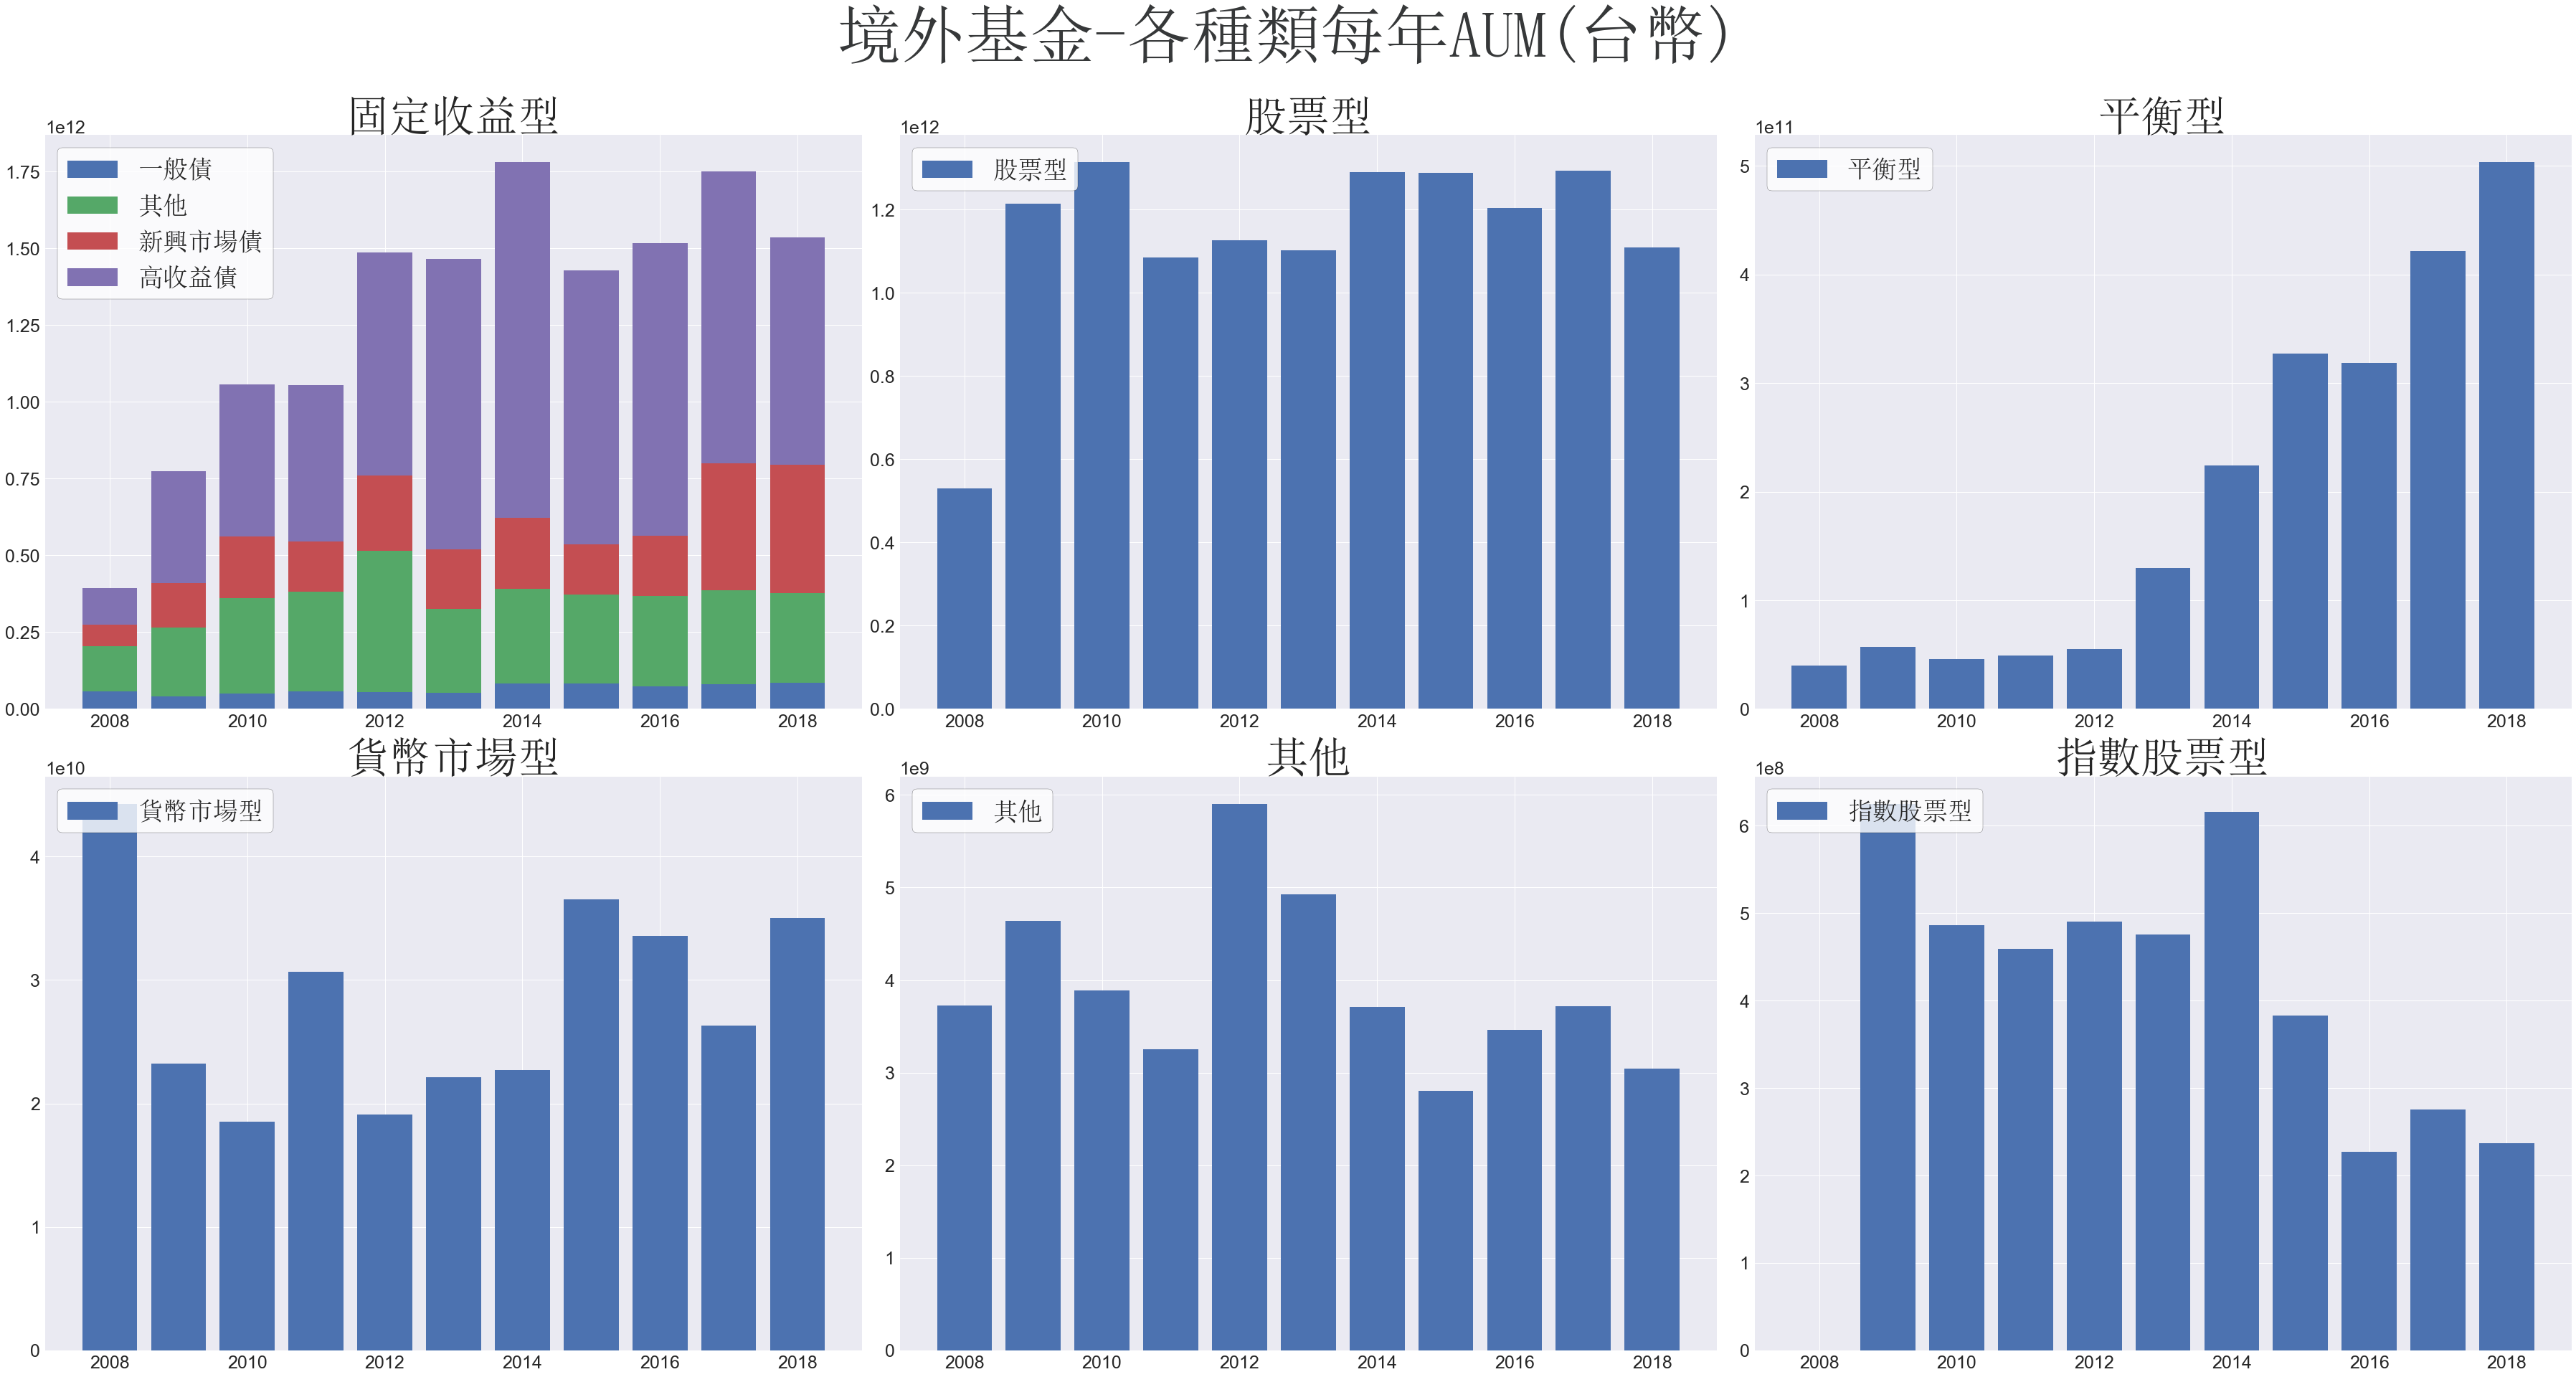

In [5]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=60)
font_legend = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=35)

plt.style.use('seaborn')
fig, axs = plt.subplots(2, 3, figsize=(50, 25))
fig.suptitle("境外基金-各種類每年AUM(台幣)", FontProperties=font, fontsize=90, y=1.065,
             color='#363839')
axs = axs.ravel()

for i in range(len(big_category_order)):
    name = big_category_order.iloc[i]    
    target = data[data.大分類 == name]
    target = target.groupby(['類型', '年分']).sum()
    target.reset_index(inplace=True)
    target = target[['類型', '年分', '金額']]
    plt.sca(axs[i])
    
    cumulative_Y = np.array([0]*len(year_index))
    for ixx in range(len(target.類型.unique())):
        fund = target.類型.unique()[ixx]
        temp_fund = target[target.類型 == fund]
        temp_fund = temp_fund.copy()
        temp_fund['year'] = temp_fund.年分
        Y = []
        for ix in year_index:
            try:
                value = temp_fund[temp_fund.year == ix]['金額'].values[0]
                if value != 0:
                    Y.append(value)
                else:
                    Y.append(0)
            except:
                Y.append(0)
        Y = np.array(Y)

        axs[i].bar(year_index, Y, bottom=cumulative_Y, label=fund)
        cumulative_Y = cumulative_Y + Y

    legend = plt.legend(prop=font_legend, frameon=True, loc='upper left')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    axs[i].set_title(name, FontProperties=font)
    axs[i].yaxis.offsetText.set_fontsize(25)
    plt.xticks(size=25)
    plt.yticks(size=25)

    plt.tight_layout();

# 各類別(大類別)基金各年AUM概況(已依據2018年之AUM排序)，使用相同y軸scale，可以看出規模差異(幾乎看不見者代表規模相對規模大者來的小)
# Stacked bar plot

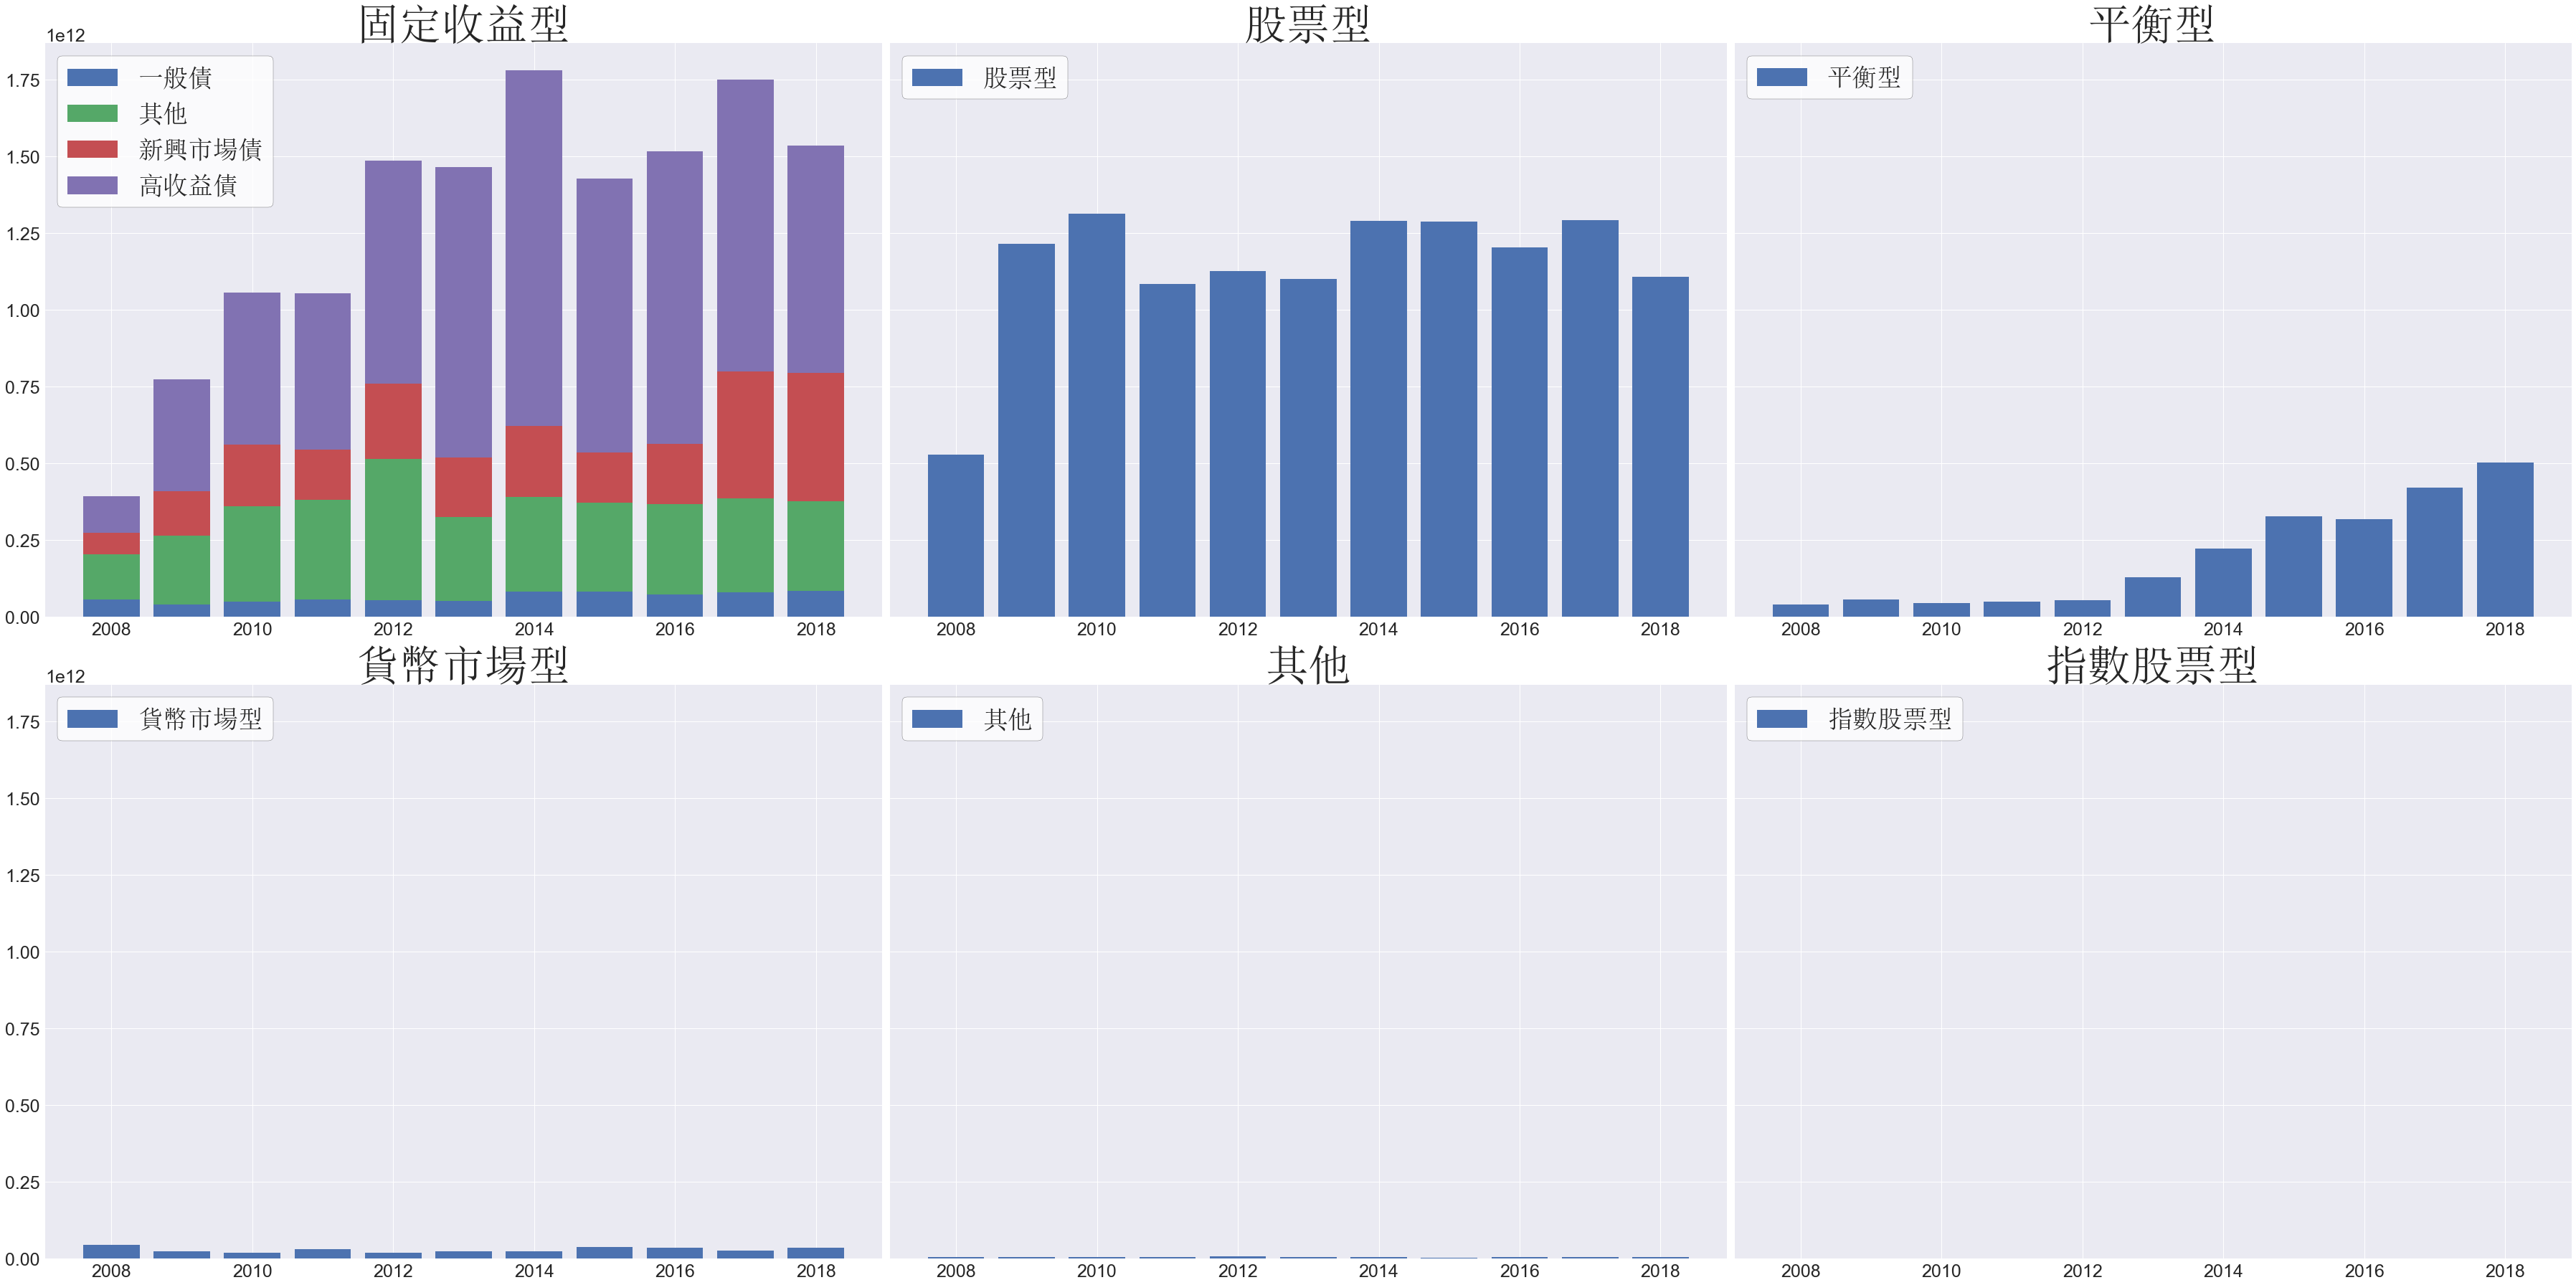

In [6]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=60)
font_legend = FontProperties(fname=r"c:\windows\Fonts\SimSun.ttc", size=35)

plt.style.use('seaborn')
fig, axs = plt.subplots(2, 3, figsize=(50, 25), sharey=True)
axs = axs.ravel()

for i in range(len(big_category_order)):
    name = big_category_order.iloc[i]    
    target = data[data.大分類 == name]
    target = target.groupby(['類型', '年分']).sum()
    target.reset_index(inplace=True)
    target = target[['類型', '年分', '金額']]
    plt.sca(axs[i])
    
    cumulative_Y = np.array([0]*len(year_index))
    for ixx in range(len(target.類型.unique())):
        fund = target.類型.unique()[ixx]
        temp_fund = target[target.類型 == fund]
        temp_fund = temp_fund.copy()
        temp_fund['year'] = temp_fund.年分
        Y = []
        for ix in year_index:
            try:
                value = temp_fund[temp_fund.year == ix]['金額'].values[0]
                if value != 0:
                    Y.append(value)
                else:
                    Y.append(0)
            except:
                Y.append(0)
        Y = np.array(Y)

        axs[i].bar(year_index, Y, bottom=cumulative_Y, label=fund)
        cumulative_Y = cumulative_Y + Y

    legend = plt.legend(prop=font_legend, frameon=True, loc='upper left')
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
    axs[i].set_title(name, FontProperties=font)
    axs[i].yaxis.offsetText.set_fontsize(25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.tight_layout();